In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from statsmodels.tsa import api as tsa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [2]:
def create_linspace(start, stop, nsamples):
    return np.linspace(start, stop, num = nsamples)

def plot(X, t = [], title = '', f_dict = {}):
    """
    f_dict = {
        'functions': [F1, F2, F3],
        'titles': ['function name', 'f name 2']
    }
    """
    plt.figure(figsize = (15, 6))
    plt.title(title)
    if len(t):
        plt.plot(t, X)
    else: plt.plot(X)
    if len(f_dict) > 0:
        legend_labels = []
        for f in f_dict["functions"]:
                if len(t):
                    plt.plot(t, f)
                else: plt.plot(f)
        for label in f_dict["titles"]:
            legend_labels.append(label)
        plt.legend(['Origin', *legend_labels])
    plt.show()

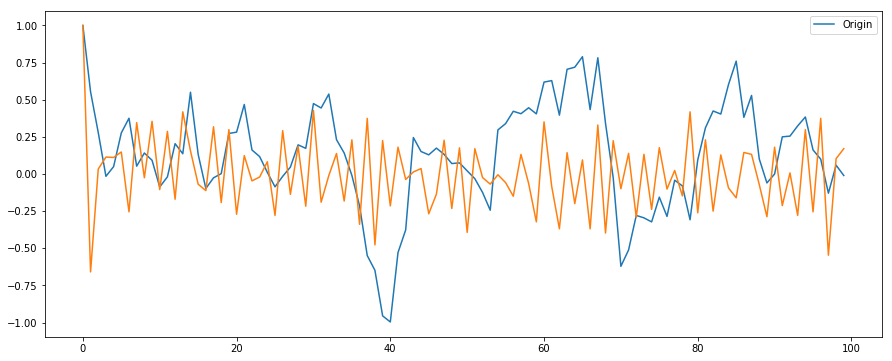

In [282]:
z1 = np.zeros(100)
z2 = np.zeros(100)
z1[0] = 1
z2[0] = 1
for i in range(1,100):
    z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn()
    z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn()

plot(z1, f_dict = {"functions": [z2], "titles": [] })

<Figure size 720x360 with 0 Axes>

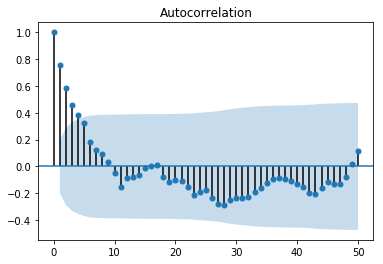

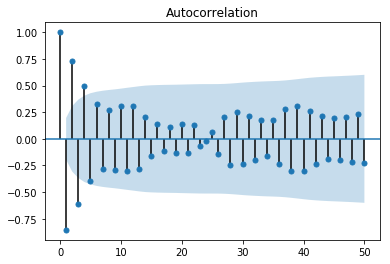

In [8]:
plt.figure(figsize = (10, 5))
plot_acf(z1, lags=50)
plot_acf(z2, lags=50)
plt.show()

Весовой коэфффициент

In [272]:
acf(z1, nlags=50)[1], acf(z2, nlags=50)[1]

(0.6502957727836788, -0.8314432474153141)

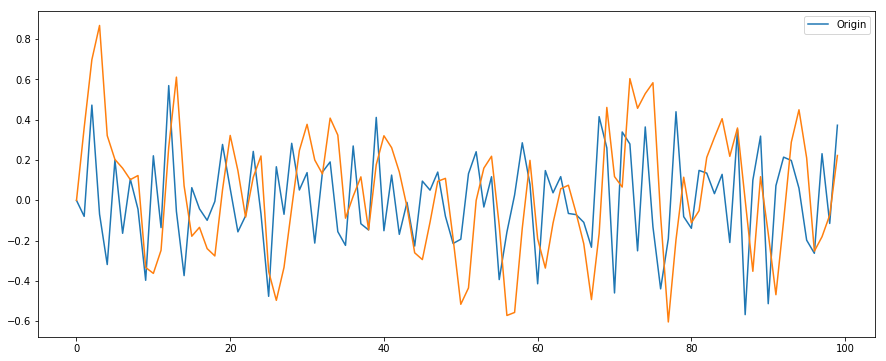

In [347]:
z3 = np.zeros(100)
z4 = np.zeros(100)
ar = 0.2 * np.random.randn(100)
for i in range(1, 100):
    z3[i] = ar[i] - 0.8 * ar[i - 1]
    z4[i] = ar[i] + 0.8 * ar[i - 1]

plot(z3, f_dict = {"functions": [z4], "titles": [] })

<Figure size 720x360 with 0 Axes>

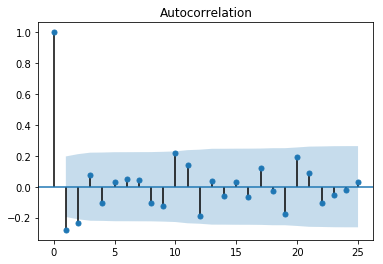

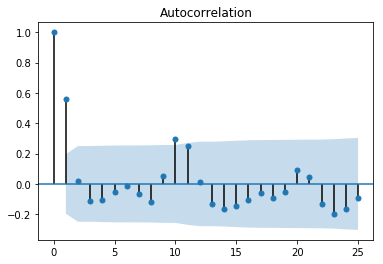

In [348]:
plt.figure(figsize = (10, 5))
plot_acf(z3, lags=25)
plot_acf(z4, lags=25)
plt.show()

Оцените весовой коэффициент

In [387]:
# Solve the quadratic equation ax**2 + bx + c = 0

# import complex math module
import cmath

a = 1
b = 1/acf(z3, nlags=50)[1]
c = 1

# calculate the discriminant
d = (b**2) - (4*a*c)

# find two solutions
sol1 = (-b-cmath.sqrt(d))/(2*a)
sol2 = (-b+cmath.sqrt(d))/(2*a)

print('The solution are {0} and {1}'.format(np.abs(sol1),np.abs(sol2)))

The solution are 1.0 and 1.0


In [389]:
# Solve the quadratic equation ax**2 + bx + c = 0

# import complex math module
import cmath

a = 1
b = 1/acf(z4, nlags=50)[1]
c = 1

# calculate the discriminant
d = (b**2) - (4*a*c)

# find two solutions
sol1 = (-b-cmath.sqrt(d))/(2*a)
sol2 = (-b+cmath.sqrt(d))/(2*a)

print('The solution are {0} and {1}'.format(sol1,sol2))

The solution are (-0.8966441208213731-0.4427519854235177j) and (-0.8966441208213731+0.4427519854235177j)


## Временной ряд процесса АРСС(1,1)

In [21]:
a = 0.2*np.random.normal(size=100)

z5 = np.zeros(100)
z6 = np.zeros(100)

z5[0] = 1
z6[0] = 1
for i in range(1,100): 
    z5[i] = 0.8*z5[i-1] + a[i] - 0.3*a[i-1]
    z6[i] = -0.8*z6[i-1] + a[i] - 0.3*a[i-1]

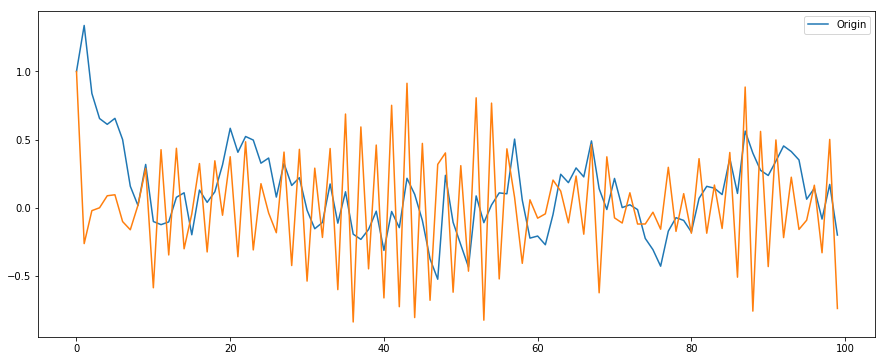

In [22]:
plot(z5, f_dict = {"functions": [z6], "titles": [] })

<Figure size 720x360 with 0 Axes>

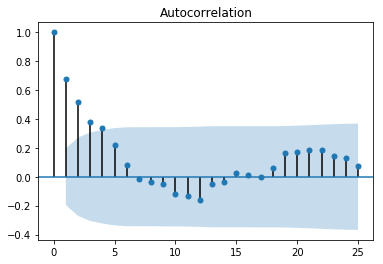

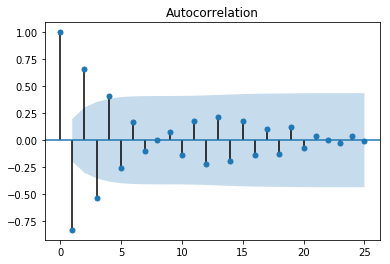

In [23]:
plt.figure(figsize = (10, 5))
plot_acf(z5, lags=25)
plot_acf(z6, lags=25)
plt.show()

## Создание АРСС с помощью функции 

In [25]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar = np.array([0.75, -0.25]) # задаем коэффициенты АР
ma = np.array([0.65, 0.35]) # задаем коэффициенты СС
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100)
# создаем ВР для АРСС (2, 2) = АРПСС (2, 0, 2) из 100 отсчетов

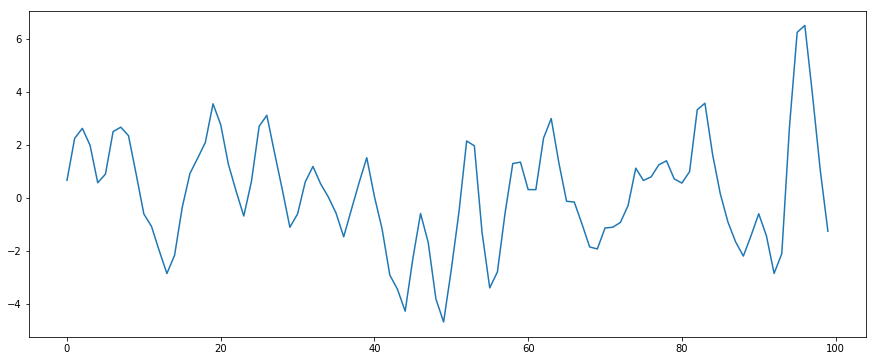

In [281]:
plot(y)

### Анализ ВР на типовом примере

In [29]:
TEST = np.asarray([0.00, 9.99, 12.89, 10.70, 5.12, -1.21, -6.50, -7.96, -4.30, 0.42, 3.41, 4.50, 3.57, 2.24, 1.78, 0.89, -1.20, -3.43, -2.35, -0.85, -0.21, -0.08, 0.95, 0.45])


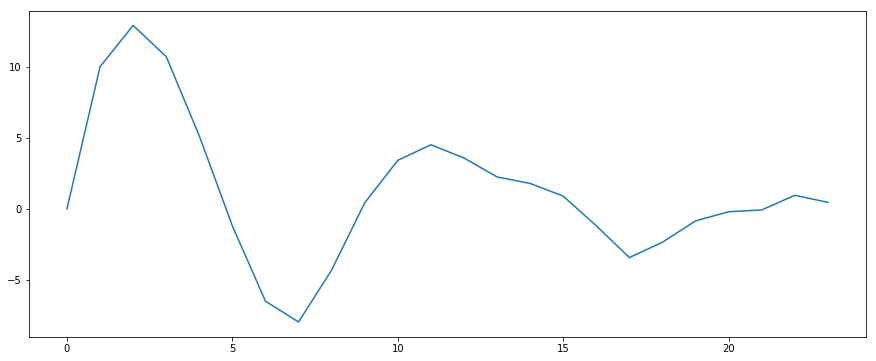

In [30]:
plot(TEST)

<Figure size 720x360 with 0 Axes>

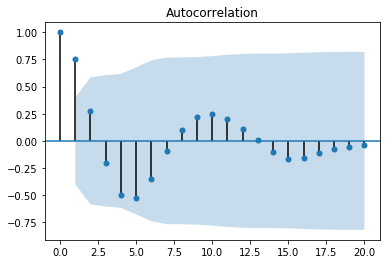

In [32]:
plt.figure(figsize = (10, 5))
plot_acf(TEST, lags=20)
plt.show()

In [36]:
arima1 = ARIMA(TEST, order = (1, 0, 0)) # создаем модель 
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР 
print(model_fit1.summary()) # выводим таблицу результатов 
arima2 = ARIMA(TEST, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())
arima3 = ARIMA(TEST, order = (3, 0, 0)) 
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                 -62.425
Method:                       css-mle   S.D. of innovations              3.207
Date:                Mon, 25 Mar 2019   AIC                            128.850
Time:                        14:19:49   BIC                            131.206
Sample:                             0   HQIC                           129.475
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7426      0.123      6.053      0.000       0.502       0.983
                                    Roots                                    
                  Real          Imaginary           M

In [284]:
import spectrum

coef1 = spectrum.aryule(TEST, 1)[0]
coef2 = spectrum.aryule(TEST, 2)[0]
coef3 = spectrum.aryule(TEST, 3)[0]

In [287]:
z1 = np.zeros_like(TEST)
z1[0] = TEST[0]
z1[1] = TEST[1]
for i in range(2, len(TEST)):
    z1[i] = z1[i-1] * -coef1[0]
    
z2 = np.zeros_like(TEST)
z2[0] = TEST[0]
z2[1] = TEST[1]
for i in range(2, len(TEST)):
    z2[i] = z2[i-1] * -coef2[0] + z2[i-2] * -coef2[1]

z3 = np.zeros_like(TEST)
z3[0] = TEST[0]
z3[1] = TEST[1]
z3[2] = TEST[2]
for i in range(3, len(TEST)):
    z3[i] = z3[i-1] * -coef3[0] + z3[i-2] * -coef3[1] + z3[i-3] * -coef3[2]

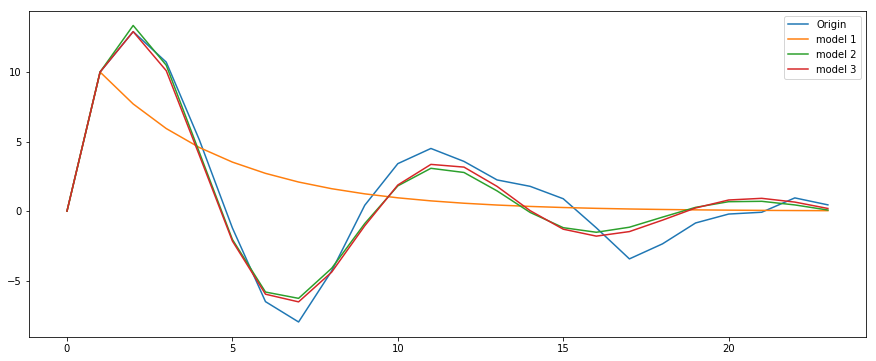

In [288]:
plot(TEST, f_dict = {"functions": [z1, z2, z3], "titles": ['model 1', 'model 2', 'model 3']})


<Figure size 720x360 with 0 Axes>

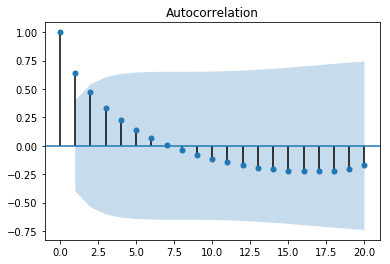

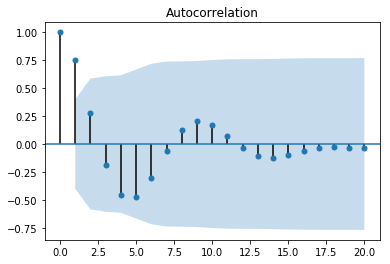

In [57]:
plt.figure(figsize = (10, 5))
plot_acf(z1, lags=20)
plot_acf(z2, lags=20)
plt.show()

In [357]:
p1 = acf(TEST, nlags=20)[1]
p2 = acf(TEST, nlags=20)[2]

f1 = p1*(1-p2) / (1-p1**2)
f2 = (p2-p1**2) / (1-p1**2)
f1, f2

(1.2777374692491614, -0.6923456257350368)

## Теперь в зависимости от своего варианта

In [322]:
variant = 9
resPath = 'LR4_materials/'
fileName = f'{variant}.mat'
columnName = f'z{variant}'

data = h5py.File(resPath + fileName, 'r')
data = data.get(columnName)
data = np.array(data)

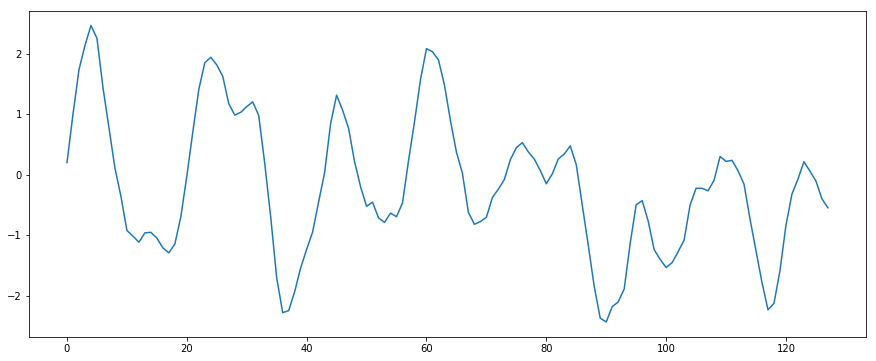

In [323]:
plot(data)

<Figure size 720x360 with 0 Axes>

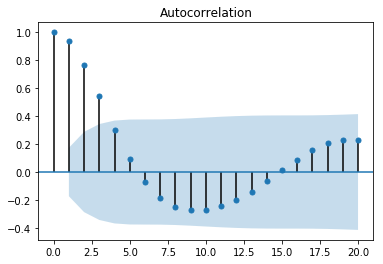

In [324]:
plt.figure(figsize = (10, 5))
plot_acf(data, lags=20)
plt.show()

In [367]:
arima1 = ARIMA(data, order = (1, 1, 0)) # создаем модель 
model_fit1 = arima1.fit() # подгоняем под ВР 
print(model_fit1.summary()) # выводим таблицу результатов 
arima2 = ARIMA(data, order = (2, 1, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())
arima3 = ARIMA(data, order = (3, 1, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  127
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  -7.023
Method:                       css-mle   S.D. of innovations              0.255
Date:                Mon, 25 Mar 2019   AIC                             20.046
Time:                        19:44:47   BIC                             28.579
Sample:                             1   HQIC                            23.513
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0127      0.105      0.121      0.904      -0.193       0.218
ar.L1.D.y      0.7903      0.055     14.381      0.000       0.683       0.898
                                    Roots           

In [362]:
arima1 = ARIMA(data, order = (4, 1, 0)) # создаем модель 
model_fit1 = arima1.fit() # подгоняем под ВР 
print(model_fit1.summary()) # выводим таблицу результатов 
arima2 = ARIMA(data, order = (5, 1, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())
arima3 = ARIMA(data, order = (6, 1, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  127
Model:                 ARIMA(4, 1, 0)   Log Likelihood                   9.889
Method:                       css-mle   S.D. of innovations              0.222
Date:                Mon, 25 Mar 2019   AIC                             -7.779
Time:                        19:42:58   BIC                              9.286
Sample:                             1   HQIC                            -0.845
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0044      0.044     -0.100      0.921      -0.091       0.082
ar.L1.D.y      0.9608      0.087     11.090      0.000       0.791       1.131
ar.L2.D.y     -0.1794      0.122     -1.467      0.1

In [378]:
arima1 = ARIMA(data, order = (0, 0, 1)) # создаем модель 
model_fit1 = arima1.fit() # подгоняем под ВР 
print(model_fit1.summary()) # выводим таблицу результатов 
arima2 = ARIMA(data, order = (1, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())
arima3 = ARIMA(data, order = (0, 1, 3))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(0, 1)   Log Likelihood                -116.633
Method:                       css-mle   S.D. of innovations              0.591
Date:                Mon, 25 Mar 2019   AIC                            239.265
Time:                        19:49:52   BIC                            247.822
Sample:                             0   HQIC                           242.742
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1781      0.104     -1.713      0.089      -0.382       0.026
ma.L1.y        1.0000      0.022     46.077      0.000       0.957       1.043
                                    Roots           

In [380]:
arima1 = ARIMA(data, order = (1, 0, 0)) # создаем модель 
model_fit1 = arima1.fit() # подгоняем под ВР 
print(model_fit1.summary()) # выводим таблицу результатов 
arima2 = ARIMA(data, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(1, 0)   Log Likelihood                 -66.162
Method:                       css-mle   S.D. of innovations              0.403
Date:                Mon, 25 Mar 2019   AIC                            138.324
Time:                        19:49:59   BIC                            146.880
Sample:                             0   HQIC                           141.800
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1768      0.458     -0.386      0.700      -1.075       0.721
ar.L1.y        0.9293      0.030     31.067      0.000       0.871       0.988
                                    Roots           

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is d

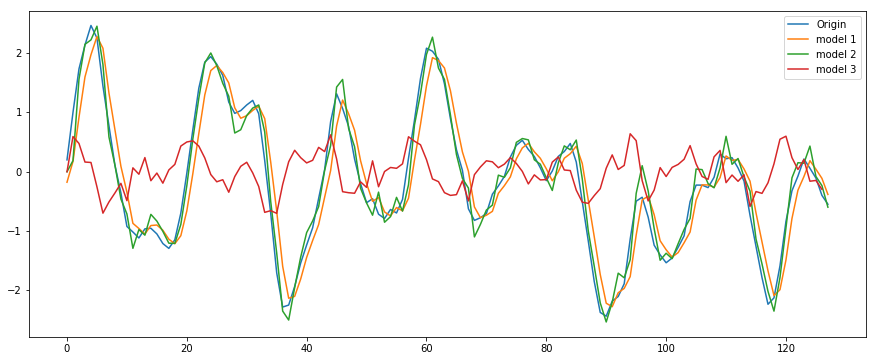

In [381]:
plot(data, f_dict = {"functions": [model_fit1.fittedvalues,model_fit2.fittedvalues, model_fit3.fittedvalues], "titles": ['model 1', 'model 2', 'model 3']})
